In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


In [2]:
import pandas as pd
dfc = pd.read_csv('/kaggle/input/seattle/calendar.csv')
dfl = pd.read_csv('/kaggle/input/seattle/listings.csv')
dfr = pd.read_csv('/kaggle/input/seattle/reviews.csv')

In [3]:
dfl

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


#  Find how Airbnb's prices vary based on features of the listing. 

# 1. Data Understanding
What is the std, mean, percentile values etc of this data. 
Verify data quality, identify null values percent

In [4]:
pd.set_option('display.max_columns', 100)
dfl.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
missing_df = pd.DataFrame({"column": dfl.columns, "percent": dfl.isnull().sum()/len(dfl)})
missing_df[missing_df["percent"] > 0.5]

,column,percent
square_feet,square_feet,0.974594
monthly_price,monthly_price,0.602672
security_deposit,security_deposit,0.511262
license,license,1.000000


In [6]:
dfl.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [7]:
dfl['jurisdiction_names'].value_counts()

WASHINGTON    3818
Name: jurisdiction_names, dtype: int64

Visualise data using histogram if needed. 

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'scrape_id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'host_listings_count'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'guests_included'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>],
       [<AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'availability_90'}>,
        <Axe

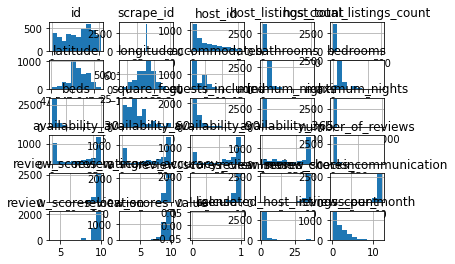

In [8]:
dfl.hist()

See if there are columns which have low variance

In [9]:
dfl.std() < 0.2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                                False
scrape_id                          True
host_id                           False
host_listings_count               False
host_total_listings_count         False
latitude                           True
longitude                          True
accommodates                      False
bathrooms                         False
bedrooms                          False
beds                              False
square_feet                       False
guests_included                   False
minimum_nights                    False
maximum_nights                    False
availability_30                   False
availability_60                   False
availability_90                   False
availability_365                  False
number_of_reviews                 False
review_scores_rating              False
review_scores_accuracy            False
review_scores_cleanliness         False
review_scores_checkin             False
review_scores_communication       False


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

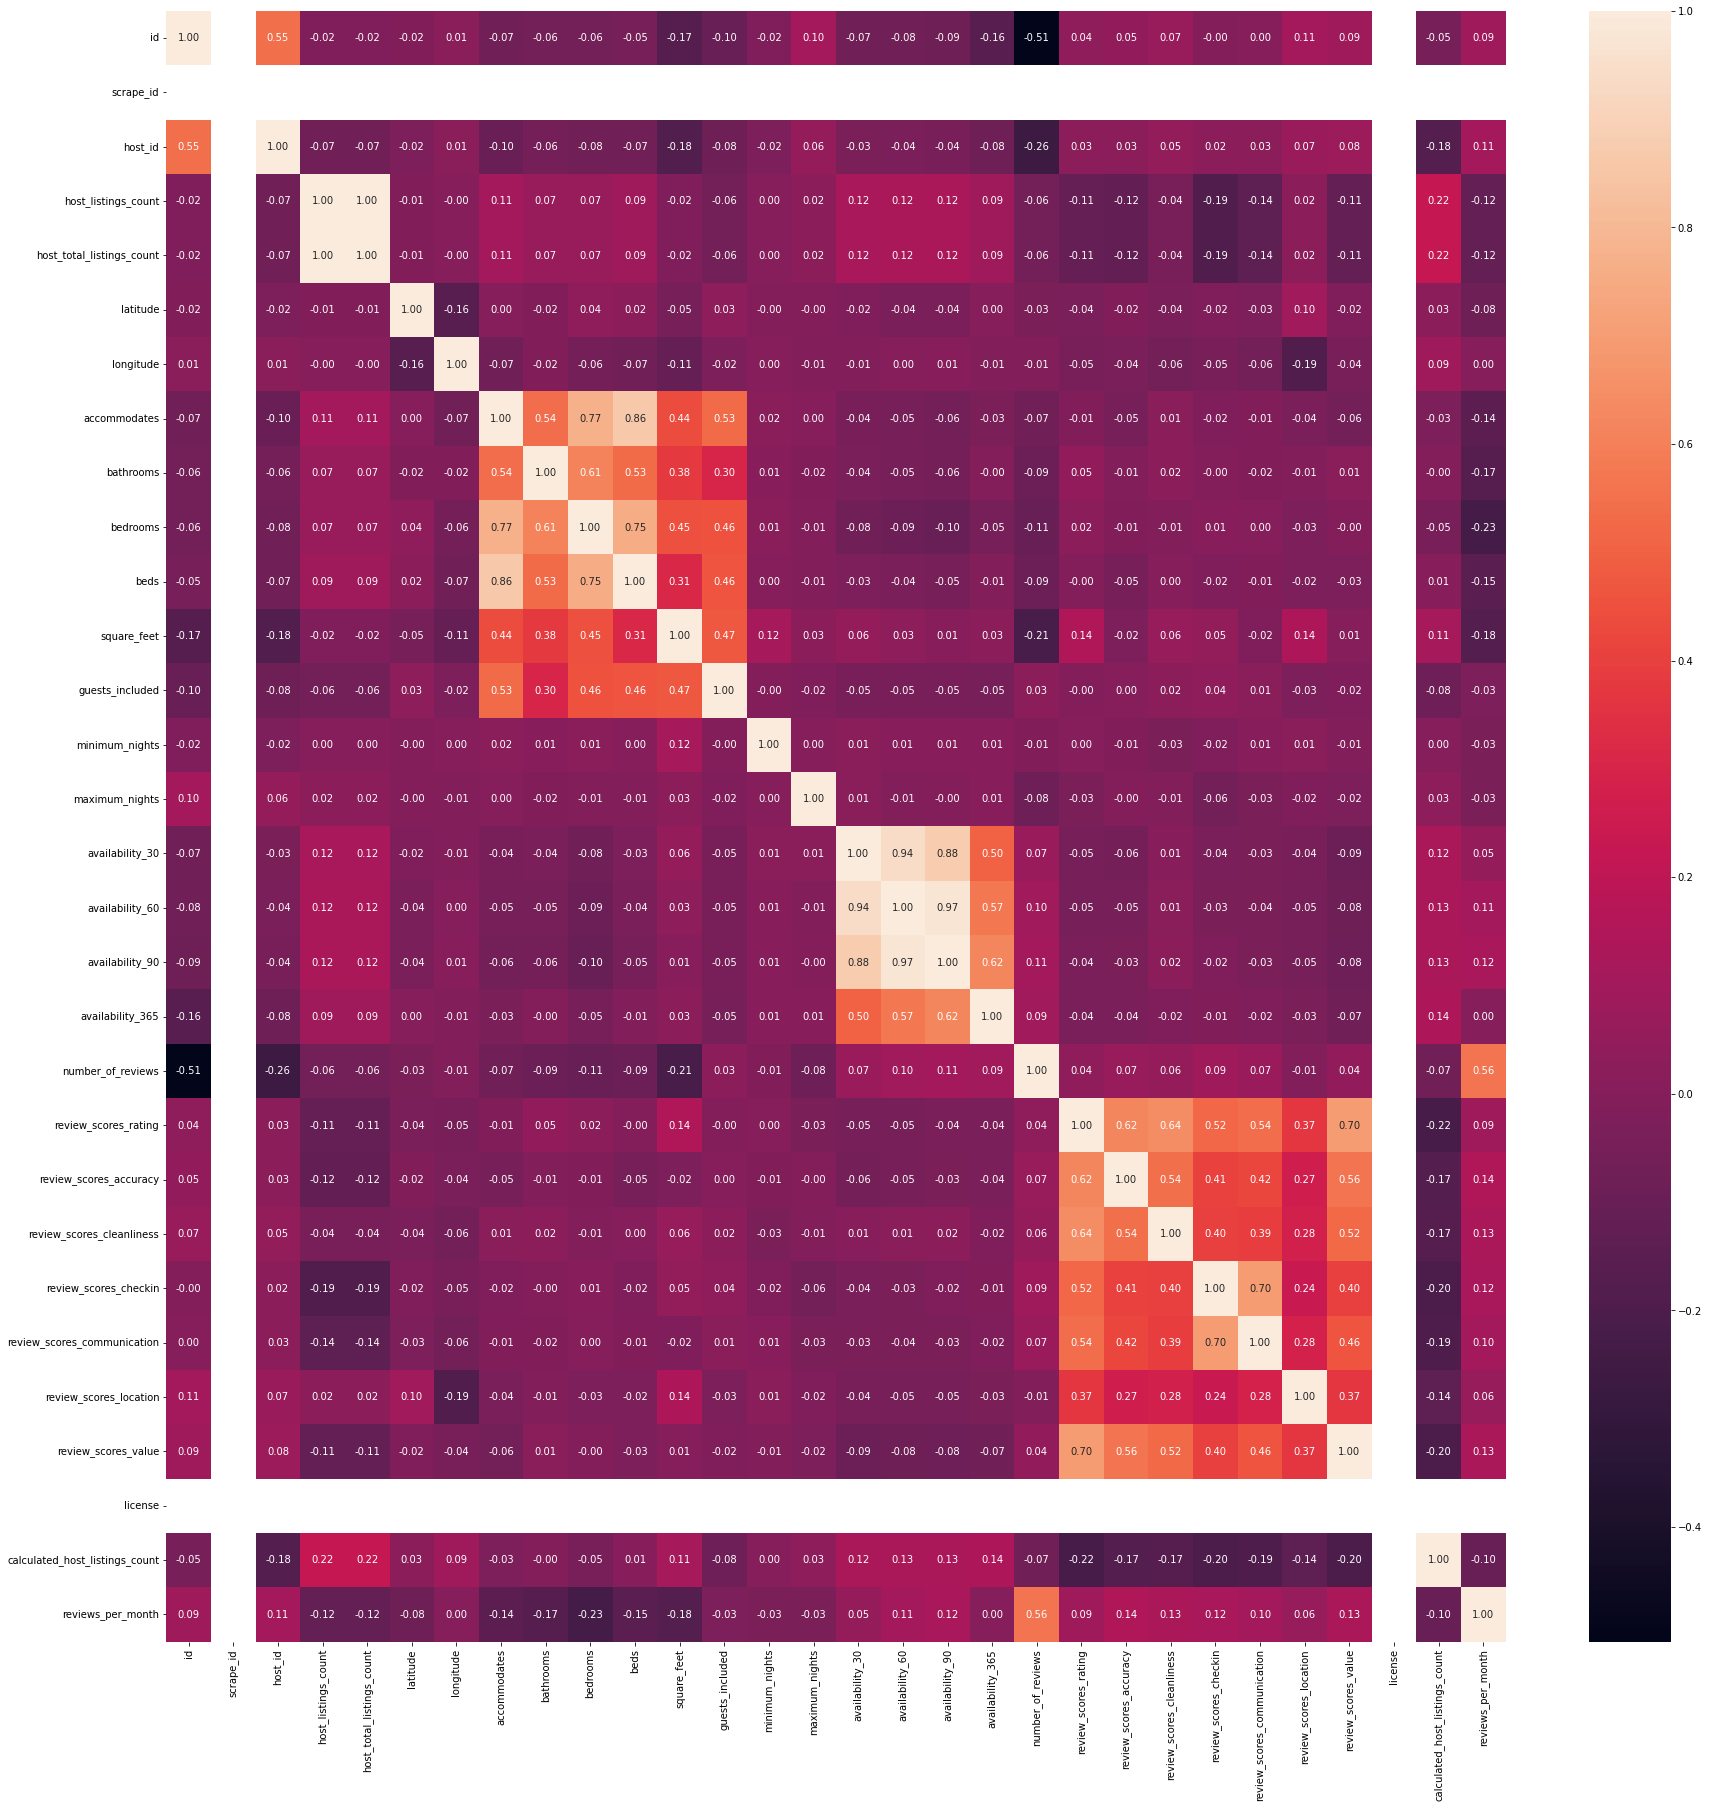

In [11]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dfl.corr(), annot=True, fmt=".2f");

# 2. Data Preparation 

Drop columns which have high correlation

In [12]:
dfl.drop(columns=['license', 'availability_30', 'availability_60'], inplace=True)

Drop columns with low std deviation/variance


In [13]:
dfl.drop(columns=['latitude', 'longitude'], inplace=True)

In [14]:
dfl.drop(columns=['square_feet'], inplace=True)

Price is not in float so convert to float

In [15]:
dfl['price'] = dfl['price'].apply(lambda x: float(x.replace("$", "").replace(",", "")))

In [16]:
dfl['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

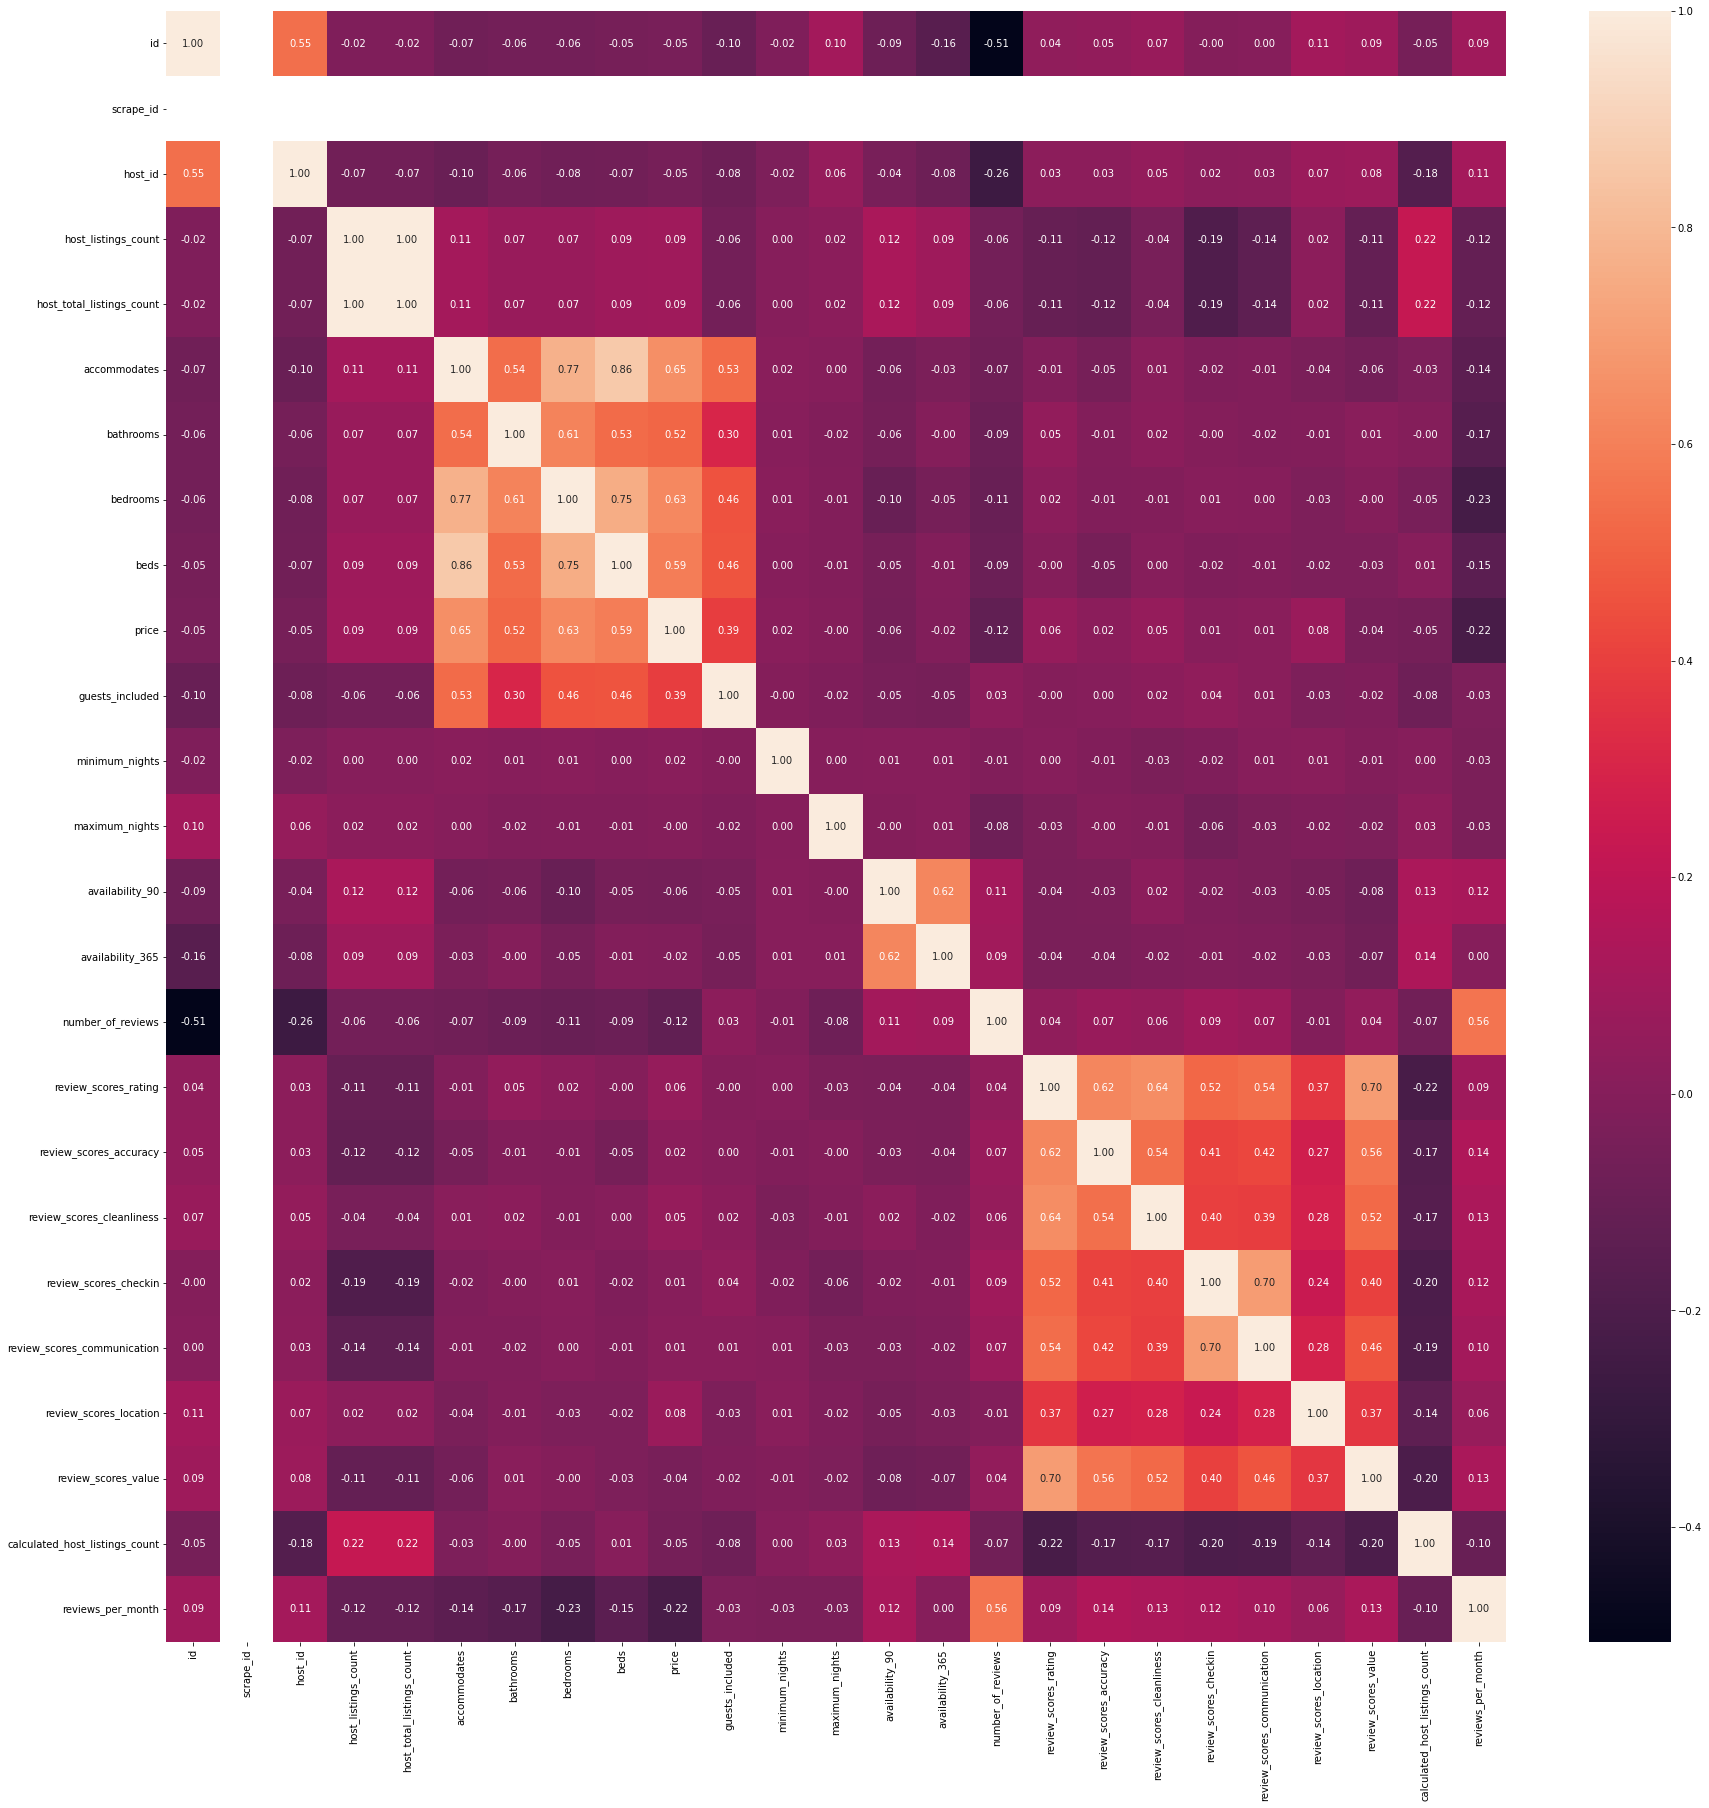

In [17]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dfl.corr(), annot=True, fmt=".2f");

# 3. Modeling

Try by removing null values

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included']

dfl_new = dfl[features + ['price']]

#Removing null values
dfl_new.dropna(inplace=True)
X = dfl_new[features]
y = dfl_new['price']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state=62)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 


lm_model.fit(X_train, y_train) 

y_predict = lm_model.predict(X_test)

score = lm_model.score(X_test, y_test)
#Predict
#Score
mse = mean_squared_error(y_test, y_predict)
r2e = r2_score(y_test, y_predict)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


# 4. Evaluation

In [19]:
mse

3222.5461915809

In [20]:

r2e

0.47691385988180823

Since r2e is very low, we try imputing

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included']

dfl_new = dfl[features + ['price']]

#Imputing unwanted values
fill_lambda = lambda col: col.fillna(col.mean())
dfl_new = dfl_new.apply(fill_lambda, axis=0)
X = dfl_new[features]
y = dfl_new['price']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state=62)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 


lm_model.fit(X_train, y_train) 

y_predict = lm_model.predict(X_test)

score = lm_model.score(X_test, y_test)
#Predict
#Score
mse = mean_squared_error(y_test, y_predict)
r2e = r2_score(y_test, y_predict)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [22]:
mse

4019.4723102571015

In [23]:
r2e

0.4953791392691941

Since r2 score is low, we cannot predict price accurately with the just numeric features. 

In [24]:
dfl_new

,accommodates,bathrooms,bedrooms,beds,guests_included,price
0,4,1.0,1.0,1.0,2,85.0
1,4,1.0,1.0,1.0,1,150.0
2,11,4.5,5.0,7.0,10,975.0
3,3,1.0,0.0,2.0,1,100.0
4,6,2.0,3.0,3.0,6,450.0
...,...,...,...,...,...,...
3813,6,2.0,3.0,3.0,1,359.0
3814,4,1.0,1.0,2.0,3,79.0
3815,2,1.0,1.0,1.0,2,93.0
3816,2,1.0,0.0,1.0,1,99.0


In [25]:
dfl.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'weekly_price',
 

In [26]:
dfl['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [27]:
dfl['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

<AxesSubplot:ylabel='price'>

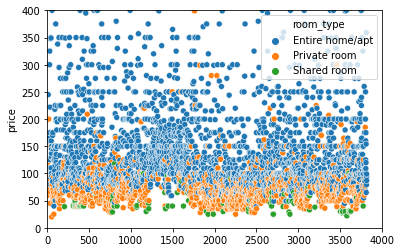

In [28]:
import seaborn as sns
plt.axis([0, 4000, 0, 400])
sns.scatterplot(data=dfl, x=dfl.index, y='price', hue='room_type')

<AxesSubplot:ylabel='price'>

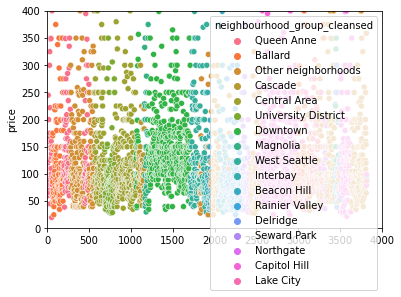

In [29]:
import seaborn as sns
plt.axis([0, 4000, 0, 400])
sns.scatterplot(data=dfl, x=dfl.index, y='price', hue='neighbourhood_group_cleansed')

<AxesSubplot:ylabel='price'>

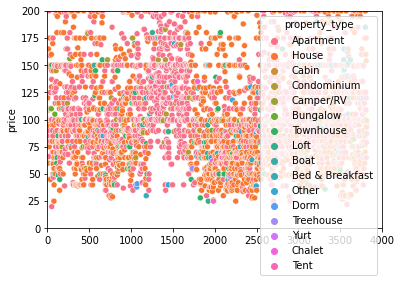

In [30]:
import seaborn as sns
plt.axis([0, 4000, 0, 200])
sns.scatterplot(data=dfl, x=dfl.index, y='price', hue='property_type')

In [31]:
dfl['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

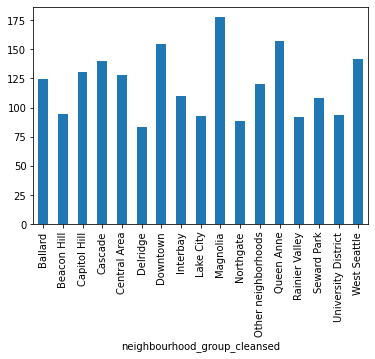

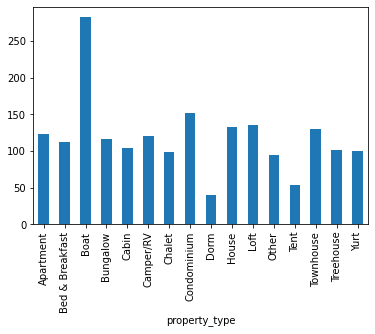

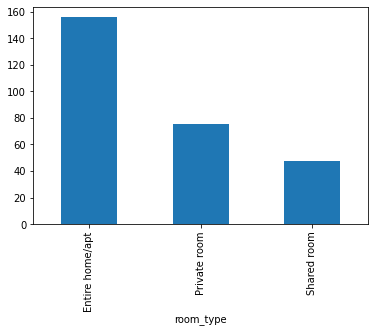

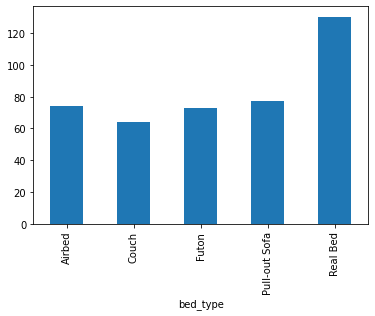

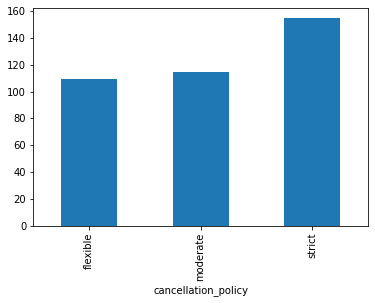

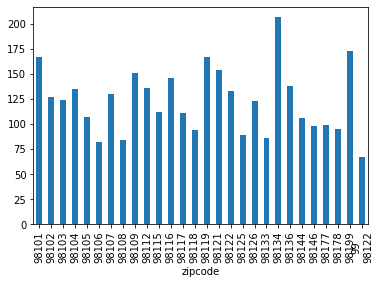

In [32]:
cat_cols = ['neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'zipcode']
for col in cat_cols:
    dfl.groupby(col)['price'].mean().plot(kind='bar')
    plt.show()

<AxesSubplot:ylabel='price'>

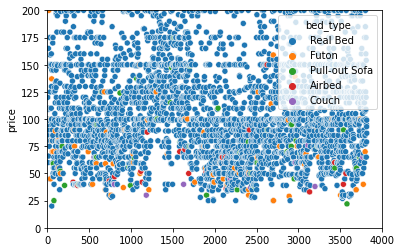

In [33]:
import seaborn as sns
plt.axis([0, 4000, 0, 200])
sns.scatterplot(data=dfl, x=dfl.index, y='price', hue='bed_type')

In [34]:
dfl['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [35]:
dfl['zipcode'].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64

<AxesSubplot:ylabel='price'>

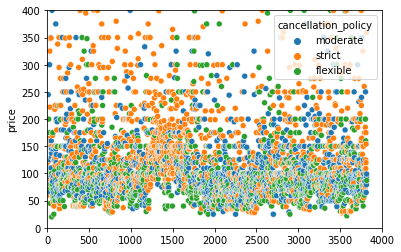

In [36]:
import seaborn as sns
plt.axis([0, 4000, 0, 400])
sns.scatterplot(data=dfl, x=dfl.index, y='price', hue='cancellation_policy')

After analysing various ccategorical features, we have finalised the below features that affect the price

In [37]:
cat_cols = ['neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'zipcode']





from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included']

dfl_new = dfl[features + ['price'] + cat_cols]

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'guests_included'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

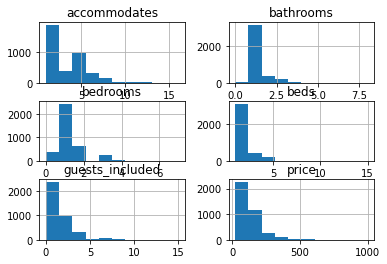

In [38]:
dfl_new.hist()

In [39]:
miss_df = pd.DataFrame({"column": dfl_new.columns, "percent": dfl_new.isnull().sum()/len(dfl_new)})
miss_df

,column,percent
accommodates,accommodates,0.000000
bathrooms,bathrooms,0.004191
bedrooms,bedrooms,0.001572
beds,beds,0.000262
guests_included,guests_included,0.000000
price,price,0.000000
neighbourhood_group_cleansed,neighbourhood_group_cleansed,0.000000
property_type,property_type,0.000262
room_type,room_type,0.000000
bed_type,bed_type,0.000000


In [40]:

#Imputing unwanted values
dfl_new.dropna(subset=features, inplace=True, axis=0)
X = dfl_new[features + cat_cols]

#One hot encode dummy values
X = pd.get_dummies(X, columns=cat_cols, dummy_na=False)
y = dfl_new['price']


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 


lm_model.fit(X_train, y_train) 

y_predict = lm_model.predict(X_test)

score = lm_model.score(X_test, y_test)
#Predict
#Score
mse = mean_squared_error(y_test, y_predict)
r2e = r2_score(y_test, y_predict)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [41]:
r2e



0.6378430480994317

In [42]:
mse

2892.1815789473685

**By including the categorical variables we increased our model r2 value by almost 30% 0.47 to 0.64**

# Finding how price varies by time of the year and week

In [43]:
dfc = pd.read_csv('/kaggle/input/seattle/calendar.csv', parse_dates=['date'])
dfc.dropna(inplace=True)

In [44]:
dfc['price'] = dfc['price'].apply(lambda x: float(x.replace("$", "").replace(",", "")))

In [45]:
#Remove listings with less than 20 data points
dfc_new = dfc.groupby('listing_id').filter(lambda x : len(x)==365)

<AxesSubplot:xlabel='date'>

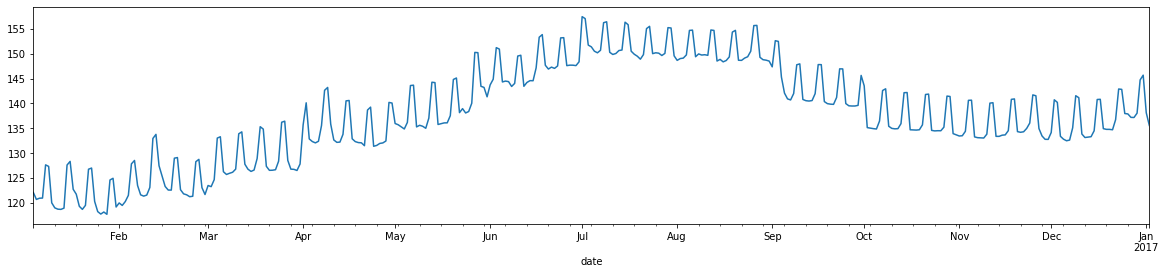

In [46]:
fig, axs = plt.subplots(figsize=(20, 4))
dfc.groupby('date').mean()["price"].plot(ax=axs)

<AxesSubplot:xlabel='date'>

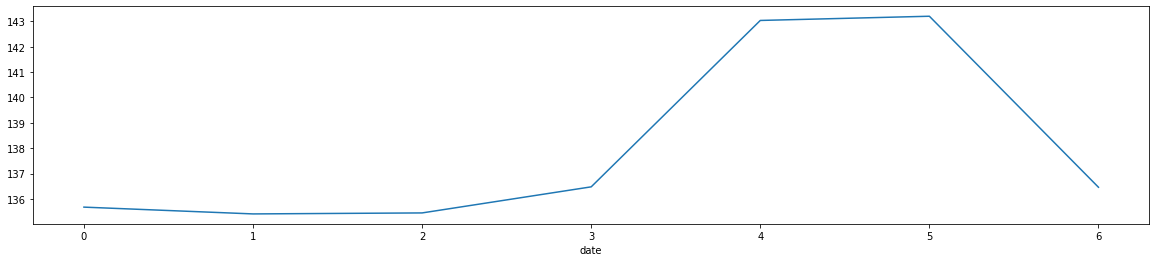

In [47]:

fig, axs = plt.subplots(figsize=(20, 4))
dfc.groupby(dfc['date'].dt.weekday).mean()["price"].plot(ax=axs)